# Pytorch Sequential Class:
- Sequential Class implement forward methods for us
- You might not be able to customize forward feed

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math

from collections import OrderedDict
torch.set_printoptions(linewidth=150)

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor() 
    ])
)

In [3]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

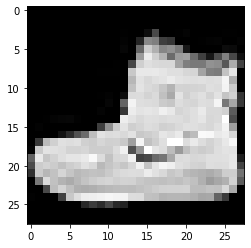

In [4]:
plt.imshow(image.squeeze(), cmap='gray')

In [5]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
in_features = image.numel()
in_features

784

In [7]:
out_features = math.floor(in_features / 2)
out_features

392

In [8]:
out_classes = len(train_set.classes)
out_classes

10

In [9]:
network1 = nn.Sequential(
    nn.Flatten(start_dim=1), # 28*28 = 784
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)  
)

network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [10]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [11]:
network1[1]

Linear(in_features=784, out_features=392, bias=True)

In [12]:
network1(image)

tensor([[-0.0947, -0.1557,  0.4402,  0.0196,  0.2162,  0.0942,  0.0638, -0.1437, -0.0227, -0.2737]], grad_fn=<AddmmBackward>)

In [13]:
# Instead of Sequential, we can do OrderedDict: You can named you layer
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [14]:
network2(image)

tensor([[-0.0610, -0.0372, -0.2145, -0.2512,  0.1660,  0.2066, -0.0374, -0.1429,  0.3047, -0.0454]], grad_fn=<AddmmBackward>)

In [18]:
# Showed that both network provide same prediction
torch.manual_seed(50)
network1 = nn.Sequential(
    nn.Flatten(start_dim=1), # 28*28 = 784
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes)  
)

torch.manual_seed(50)
layers = OrderedDict([
    ('flat', nn.Flatten(start_dim=1)),
    ('hidden', nn.Linear(in_features, out_features)),
    ('output', nn.Linear(out_features, out_classes))
])

network2 = nn.Sequential(layers)

print(f"Network 1: {network1(image)}")
print(f"Network 2: {network2(image)}")

Network 1: tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>)
Network 2: tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>)


In [19]:
# Third way to create network
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module("flat", nn.Flatten(start_dim=1))
network3.add_module("hidden", nn.Linear(in_features, out_features))
network3.add_module("output", nn.Linear(out_features, out_classes))
network3

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [20]:
network1(image), network2(image), network3(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

## Builiding a Network Class

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1) # in_channel = 1 = grayscale, hyperparam, hyperparam
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1) # we in crease the output channel when have extra conv layers
                
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120, bias=True) # we also shrink the number of features to number of class that we have
        self.fc2 = nn.Linear(in_features = 120, out_features=60, bias=True)
        self.out = nn.Linear(in_features = 60, out_features=10, bias=True) 
        
    def forward(self, t):
        # input layer
        t = t
        
        # convolution 1, not 
        t = self.conv1(t)
        t = F.relu(t) # operation do not use weight, unlike layers
        t = F.max_pool2d(t, kernel_size=2, stride=2) # operation do not use weight, unlike layers
        
        # convolution 2: => relu => maxpool
        t = self.conv2(t)
        # WHY do we need these 2 layers?
        t = F.relu(t) 
        t = F.max_pool2d(t, kernel_size=2, stride=2) # how to determine these values?
        
        # Transition from Conv to Linear will require flatten
        t = t.reshape(-1, 12*4*4) # 4x4 = shape of reduce image (originally 28x28)
        
        # linear 1:
        t = self.fc1(t)
        t = F.relu(t)
        
        # linear 2:
        t = self.fc2(t)
        t = F.relu(t)
        
        # output:
        t = self.out(t)
        
        return t

In [23]:
torch.manual_seed(50)
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

## Building the same network using Sequential

In [26]:
# way 1 - Sequential - no need forward, contain ReLU, MaxPool
torch.manual_seed(50)
sequential1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12*4*4, out_features=120),
    nn.ReLU(),
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=10)
)

In [37]:
torch.manual_seed(50)
layers = OrderedDict([
    ('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)),
    ('relu1', nn.ReLU()),
    ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
    
    ('conv2', nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)),
    ('relu2', nn.ReLU()),
    ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
    
    ('flatten', nn.Flatten(start_dim=1)),
    ('fc1', nn.Linear(in_features=12*4*4, out_features=120)),
    ('relu3', nn.ReLU()),
    
    ('fc2', nn.Linear(in_features=120, out_features=60)),
    ('relu4', nn.ReLU()),
    ('out', nn.Linear(in_features=60, out_features=10))
])

sequential2 = nn.Sequential(layers)

In [38]:
torch.manual_seed(50)
sequential3 = nn.Sequential()
sequential3.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5))
sequential3.add_module('relu1', nn.ReLU())
sequential3.add_module('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2))

sequential3.add_module('conv2', nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5))
sequential3.add_module('relu2', nn.ReLU())
sequential3.add_module('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))

sequential3.add_module('flatten', nn.Flatten(start_dim=1))
sequential3.add_module('fc1', nn.Linear(in_features=12*4*4, out_features=120))
sequential3.add_module('relu3', nn.ReLU())

sequential3.add_module('fc2', nn.Linear(in_features=120, out_features=60))
sequential3.add_module('relu4', nn.ReLU())
sequential3.add_module('out', nn.Linear(in_features=60, out_features=10))

In [39]:
sequential1

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=192, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=60, bias=True)
  (10): ReLU()
  (11): Linear(in_features=60, out_features=10, bias=True)
)

In [40]:
sequential2

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [41]:
sequential3

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [46]:
network(image), sequential1(image), sequential2(image), sequential3(image)

(tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>))